In [1]:
import numpy as np
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.legend_handler import HandlerPatch
from shapely.geometry.point import Point

In [2]:
#spatial unit
region = gpd.read_file(r"D:\NUS\project\Singapore_subzone\region_2019\sg_island_region.shp")
subzone = gpd.read_file(r"D:\NUS\project\Singapore_subzone\subzone_2019\sg_island_subzone_2019\master-plan-2019-subzone-boundary-no-sea-geojson-polygon.shp")
#input results
gwpr_results = pd.read_csv(r"C:\Users\YOLO\Desktop\GWR_results\subzone\subzone_COVID-visit\mgwr_results\p4_mgwr_results_results.csv")
subzone = subzone.to_crs('EPSG:4326')


In [3]:
cols = gwpr_results.columns
print(cols)

Index(['SUBZONE_N', 'x_coor', 'y_coor', 'y', 'ols_residual', 'mgwr_yhat',
       'mgwr_residual', 'localR2', 'beta_Intercept', 'beta_outdoor',
       'beta_residential', 'beta_commercials', 'beta_mixed', 'beta_business',
       'beta_ENTROPY_SCORE', 'beta_ROAD_DENSITY', 'beta_AVG_BC',
       'beta_accessibility', 'beta_NDVI', 'beta_Nodes_Density', 'se_Intercept',
       'se_outdoor', 'se_residential', 'se_commercials', 'se_mixed',
       'se_business', 'se_ENTROPY_SCORE', 'se_ROAD_DENSITY', 'se_AVG_BC',
       'se_accessibility', 'se_NDVI', 'se_Nodes_Density', 't_Intercept',
       't_outdoor', 't_residential', 't_commercials', 't_mixed', 't_business',
       't_ENTROPY_SCORE', 't_ROAD_DENSITY', 't_AVG_BC', 't_accessibility',
       't_NDVI', 't_Nodes_Density', 'p_Intercept', 'p_outdoor',
       'p_residential', 'p_commercials', 'p_mixed', 'p_business',
       'p_ENTROPY_SCORE', 'p_ROAD_DENSITY', 'p_AVG_BC', 'p_accessibility',
       'p_NDVI', 'p_Nodes_Density', 'sumW_Intercept', 'sumW

In [4]:
cols_est = list(cols[9:20])
cols_p_values = list(cols[45:56])

In [5]:
def significant(subzone,df,i):
    df_significant = df.loc[(df[i]<0.05)].copy()
    df_significant.index = range(len(df_significant))
    subzone = subzone.merge(df_significant,on = 'SUBZONE_N',how = 'right')
    return subzone

In [6]:
def draw(df,n,maxi,mini,num):
    fig, ax = plt.subplots(figsize = (10, 6))
    subzone.plot(ax = ax,facecolor = "lightgrey",ec = "grey",linewidth = 0.8,label = 'Region')
     
    df.plot(ax = ax, column=cols_est[n],cmap='RdBu_r',legend=True, ec = "grey",linewidth = 0.6,vmax = maxi,vmin = mini,label = 'Subzone')
    region.plot(ax = ax,facecolor = "none",ec = "black",linewidth = 1.5,label = 'No significant')
    
    region_patch = mpatches.Patch(facecolor='none',ec = 'black',label = 'region',linewidth = 1.5)
    subzone_patch = mpatches.Patch(facecolor='none',ec = 'grey',label = 'subzone')
    nosignificant_subzone_patch = mpatches.Patch(facecolor='lightgrey',ec = "black",label = 'isolated subzone')
    removed_subzone_patch = mpatches.Patch(facecolor='grey',ec = "black",label = 'isolated subzone')
    
    lines = [region_patch,subzone_patch,nosignificant_subzone_patch,removed_subzone_patch]
    labels = [t.get_label() for t in ax.collections[-4:]]
    ax.legend(lines,labels,edgecolor = None,loc = 'lower right',fontsize = 6)
    ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))
    
    plt.text(103.635,1.365,s='West Region',rotation=65, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':8})
    plt.text(103.755,1.260,s='Central Region',rotation=-30, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':8})
    plt.text(103.932,1.292,s='East Region',rotation=15, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':8})
    plt.text(103.875,1.446,s='North-east Region',rotation=-26, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':8})
    plt.text(103.723,1.456,s='North Region',rotation=0, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':8})
    ax.axis('off')
    print(cols_est[num])
    if len(df)>20:
        plt.savefig(r'D:\NUS\project\thesis_results\maps\local effect\phase4'+'\\'+cols_est[num]+'.jpg',dpi = 1200)

In [7]:
points = gpd.GeoSeries([Point(102.7,1.25), Point(103.7, 1.25)], crs=4326)
points = points.to_crs('EPSG:3414')
distance_meters = points[0].distance(points[1])
distance_meters

111301.44035524513

In [8]:
cols_est

['beta_outdoor',
 'beta_residential',
 'beta_commercials',
 'beta_mixed',
 'beta_business',
 'beta_ENTROPY_SCORE',
 'beta_ROAD_DENSITY',
 'beta_AVG_BC',
 'beta_accessibility',
 'beta_NDVI',
 'beta_Nodes_Density']

29
beta_outdoor


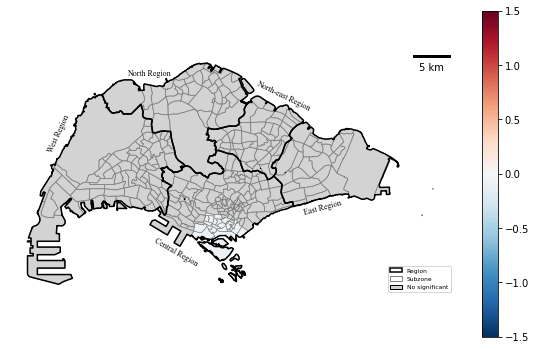

In [9]:
resi_significant = significant(subzone,gwpr_results,cols_p_values[0])
resi_significant.index = range(len(resi_significant))
print(len(resi_significant))
draw(resi_significant,0,1.5,-1.5,0)

0
beta_residential


D:\anaconda\Anaconda\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


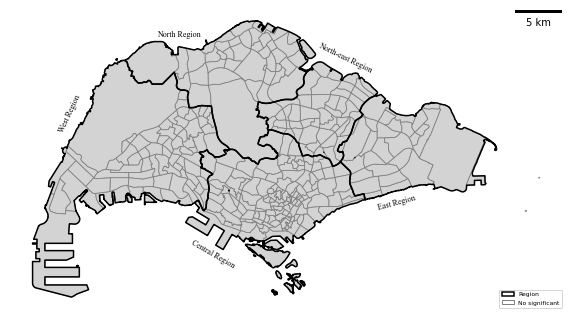

In [10]:
comm_significant = significant(subzone,gwpr_results,cols_p_values[1])
comm_significant.index = range(len(comm_significant))
print(len(comm_significant))
draw(comm_significant,1,1.5,-1.5,1)

147
beta_commercials


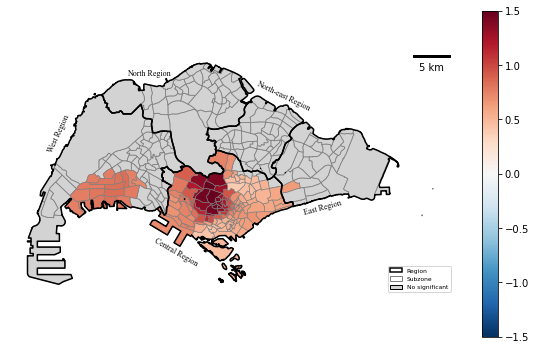

In [11]:
mixed_significant = significant(subzone,gwpr_results,cols_p_values[2])
mixed_significant.index = range(len(mixed_significant))
print(len(mixed_significant))
draw(mixed_significant,2,1.5,-1.5,2)

169
beta_mixed


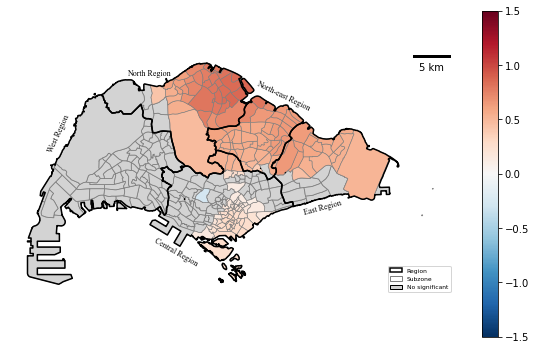

In [12]:
busi_significant = significant(subzone,gwpr_results,cols_p_values[3])
busi_significant.index = range(len(busi_significant))
print(len(busi_significant))
draw(busi_significant,3,1.5,-1.5,3)

0
beta_business


D:\anaconda\Anaconda\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


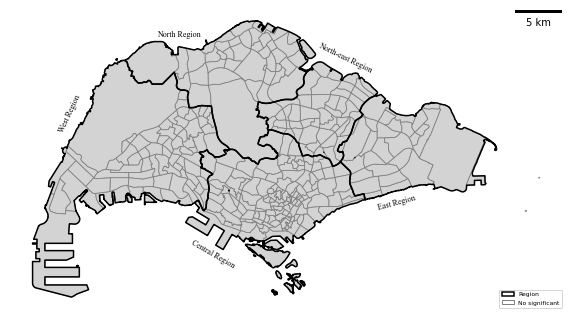

In [13]:
outdoor_significant = significant(subzone,gwpr_results,cols_p_values[4])
outdoor_significant.index = range(len(outdoor_significant))
print(len(outdoor_significant))
draw(outdoor_significant,4,1.5,-1.5,4)

258
beta_ENTROPY_SCORE


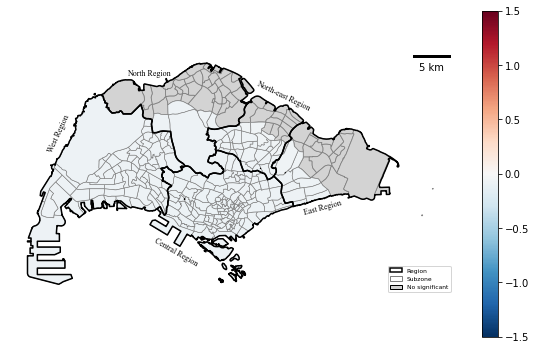

In [14]:
es_significant = significant(subzone,gwpr_results,cols_p_values[5])
es_significant.index = range(len(es_significant))
print(len(es_significant))
draw(es_significant,5,1.5,-1.5,5)

0
beta_ROAD_DENSITY


D:\anaconda\Anaconda\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


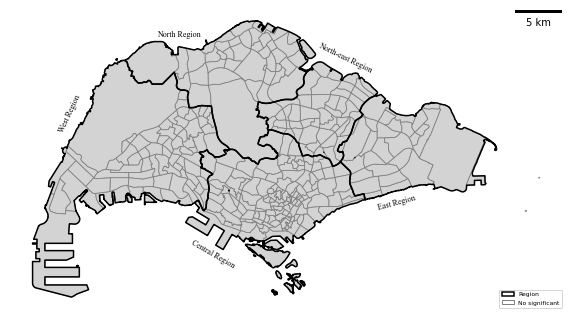

In [15]:
rd_significant = significant(subzone,gwpr_results,cols_p_values[6])
rd_significant.index = range(len(rd_significant))
print(len(rd_significant))
draw(rd_significant,6,1.5,-1.5,6)

0
beta_AVG_BC


D:\anaconda\Anaconda\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


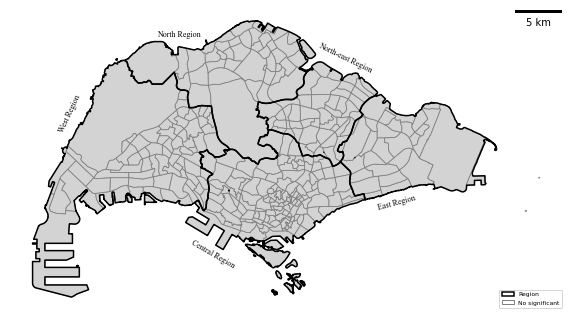

In [16]:
bc_significant = significant(subzone,gwpr_results,cols_p_values[7])
bc_significant.index = range(len(bc_significant))
print(len(bc_significant))
draw(bc_significant,7,1.5,-1.5,7)

328
beta_accessibility


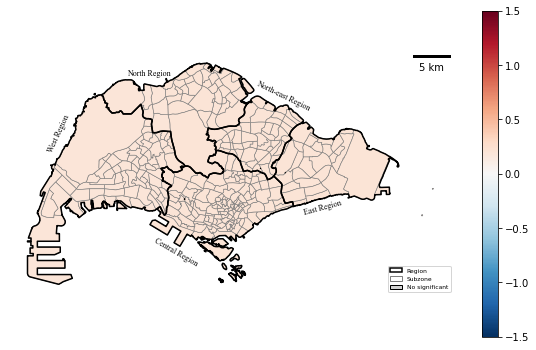

In [17]:
acc_significant = significant(subzone,gwpr_results,cols_p_values[8])
acc_significant.index = range(len(acc_significant))
print(len(acc_significant))
draw(acc_significant,8,1.5,-1.5,8)

0
beta_NDVI


D:\anaconda\Anaconda\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


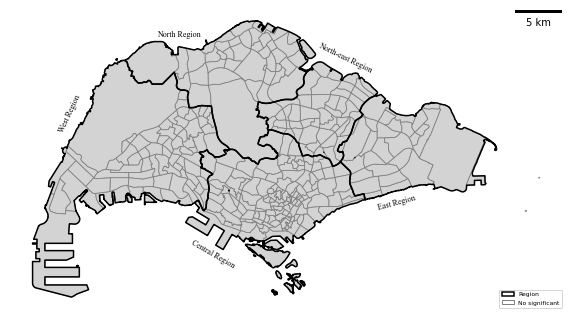

In [18]:
ndvi_significant = significant(subzone,gwpr_results,cols_p_values[9])
ndvi_significant.index = range(len(ndvi_significant))
print(len(ndvi_significant))
draw(ndvi_significant,9,1.5,-1.5,9)

153
beta_Nodes_Density


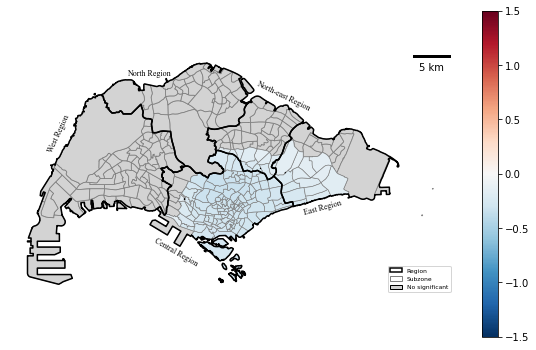

In [19]:
nd_significant = significant(subzone,gwpr_results,cols_p_values[10])
nd_significant.index = range(len(nd_significant))
print(len(nd_significant))
draw(nd_significant,10,1.5,-1.5,10)